# Quasi-Newton 

This notebook replicates the numerical expeirment found [here TODO: insert link.]()

### Overview  
**Experiment 1:**
$w \in \{1,2,3,4,5,6\}$, ``plfag = true``, ``SR1``, & ``S_update_d``  
- As we increase the sample size the algorithm degrades in performance.

<br>

**Experiment 2:**
$w \in \{1,2,3,4,5,6\}$, ``plfag = true``, ``SR1``, & ``S_update_d``  
- As we increase the sample size the algorithm degrades in performance.

<br>

**Experiment 3:**
$w = 4$, ``plfag`` comparison with ``SR1`` using ``S_update_a`` & ``S_update_d``  
- The blue curves (sample 278 directions do not include pk, (6.1a)) are
     consistent with the observations in [5, 6] that 279 including the 
     approximate secant curvature information in a preliminary QN update 
     is 280 advantageous.  

<br>

**Experiment 4:**
$w = 4$, ``plfag`` comparison with ``SR1`` using ``S_update_a`` & ``S_update_d``  
- Shows the effect of varying the sample selection strategy between
     284 (6.1d)–(6.1f) The simple purely randomized supplemental directions
     from (6.1d) gave 285 good results.

In [2]:
# using Pkg; # install dependencies as needed
# Pkg.add("Plots") 
# Pkg.add(url="https://github.com/danphenderson/TRS.jl");
# Pkg.add(url="https://github.com/danphenderson/BlockOpt.jl")

using BlockOpt, Plots, Random, LinearAlgebra

BLAS.set_num_threads(4)

┌ Info: Precompiling BlockOpt [7a727886-0b10-4b07-aad6-3ce240a7f679]
└ @ Base loading.jl:1423


**Model Construction:** Analyzing the unconstrained minimization of the [Rosenbrock](https://en.wikipedia.org/wiki/Rosenbrock_function) function mapping
$$f: ℜ^{100} \longrightarrow ℜ.$$

In [5]:
const SEED = 123456

Random.seed!(SEED)

function rosen(x)
    N = lastindex(x)
    100sum((x[i + 1] - x[i]^2)^2 for i = 1:N-1) + sum((x[i] - 1)^2 for i = 1:N-1)
end

function ∇rosen!(g, x)
    N = lastindex(x)
    g[1] = -2 * (1 - x[1]) - 400x[1] * (-x[1]^2 + x[2])

    for i in 2:N-1
        g[i] = -2 * (1 - x[i]) + 200 * (-x[i - 1]^2 + x[i]) - 400x[i] * (-x[i]^2 + x[1 + i])
    end
    
    g[N] = 200 * (x[N] - x[N-1]^2)    
    return g
end

x₀ = randn(100)

model = Model("Rosenbrock")

objective!(model, rosen)

gradient!(model, ∇rosen!)

initial_iterate!(model, x₀);

### Experiment 1

In [6]:
Random.seed!(SEED)

options = BlockOpt.DriverOptions();

driver = Driver(QN_update=PSB, S_update=S_update_d, pflag=true, options=options)

max_iterations!(driver, 12000)

# SIM₁ = Dict{Int, BlockOpt.Simulation}()

SIM₁ = []

for two_w ∈ 2:2:12 # w ∈ 1:6 
    Random.seed!(SEED)

    samples!(options, two_w)

    println(two_w)

    push!(SIM₁, optimize(model, driver))
end

show.(SIM₁)

2
4
6
8
10
12


6-element Vector{Any}:
 SUCCESS 3.875074828041232e-6 ≤ 1.0e-5 in 6524 steps
--------------------------------------
  Minimum f:      8.818599936299286e-15
  Minimum ||∇f||: 3.875074828041232e-6
  Minimum Δ:      1.2467269551825277e-6
  Minimum Step:   7.583540597108531e-7

  Model: Rosenbrock
  -------------------
    objective:         rosen
    gradient:          ∇rosen!
    initial iterate:   [0.640843, ..., 0.436067, -0.385382, -0.494696]
    dimension:         100
    directory:         /Users/dhenderson/.julia/dev/BlockOpt/src/notebooks/Rosenbrock
    objective formula: missing
  Driver:
  -------------------
    S_update:  S_update_d
    QN_update: PSB
    pflag:     true
    Options:
      samples:        12
      Δ_max:          100.0
      δ_tol:          1.0e-12
      ϵ_tol:          1.0e-5
      max_iterations: 12000
  Trace:
  -------------------
    Weaver:
      f_vals:   [40659.973622, ..., 0.000000, 0.000000, 0.000000]
      ∇f_norms: [17511.657823, ..., 0.000574, 0.00

SUCCESS 3.875074828041232e-6 ≤ 1.0e-5 in 6524 steps
--------------------------------------
  Minimum f:      8.818599936299286e-15
  Minimum ||∇f||: 3.875074828041232e-6
  Minimum Δ:      1.2467269551825277e-6
  Minimum Step:   7.583540597108531e-7

  Model: Rosenbrock
  -------------------
    objective:         rosen
    gradient:          ∇rosen!
    initial iterate:   [0.640843, ..., 0.436067, -0.385382, -0.494696]
    dimension:         100
    directory:         /Users/dhenderson/.julia/dev/BlockOpt/src/notebooks/Rosenbrock
    objective formula: missing
  Driver:
  -------------------
    S_update:  S_update_d
    QN_update: PSB
    pflag:     true
    Options:
      samples:        12
      Δ_max:          100.0
      δ_tol:          1.0e-12
      ϵ_tol:          1.0e-5
      max_iterations: 12000
  Trace:
  -------------------
    Weaver:
      f_vals:   [40659.973622, ..., 0.000000, 0.000000, 0.000000]
      ∇f_norms: [17511.657823, ..., 0.000574, 0.000102, 0.000004]
      Δ_

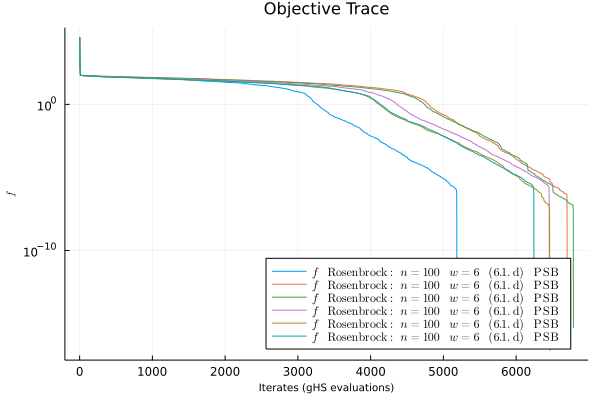

In [9]:
show.(SIM₁)

o1 = BlockOpt.options(BlockOpt.driver(SIM₁[2]))

o2 = BlockOpt.options(BlockOpt.driver(SIM₁[4]))

@show samples(o1) ≡ 12, samples(o2) ≡ 10

objtrace(collect(values(SIM₁))...)

### Experiment 2

In [4]:
Random.seed!(SEED)

driver = Driver(QN_update=SR1, S_update=S_update_d, pflag=true)

SIM₁ = Dict{Int, BlockOpt.Simulation}()

for two_w ∈ 2:2:12 # w ∈ 1:6 
    Random.seed!(SEED)

    samples!(driver, two_w)

    SIM₁[two_w] = optimize(model, driver)
end

SIM₁

Dict{Int64, BlockOpt.Simulation} with 6 entries:
  4  => SUCCESS 7.47996226383005e-6 ≤ 1.0e-5 in 349 steps…
  6  => SUCCESS 1.4159887393132252e-6 ≤ 1.0e-5 in 310 steps…
  2  => SUCCESS 1.8790097699880246e-6 ≤ 1.0e-5 in 522 steps…
  10 => SUCCESS 7.278378871442928e-6 ≤ 1.0e-5 in 229 steps…
  12 => SUCCESS 1.7658519062198242e-7 ≤ 1.0e-5 in 234 steps…
  8  => SUCCESS 4.586031131094547e-7 ≤ 1.0e-5 in 306 steps…

### Experiment 3

### Experiment 4